In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [122]:
df = pd.read_csv("train.csv")

In [124]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## EDA

### Missing Values

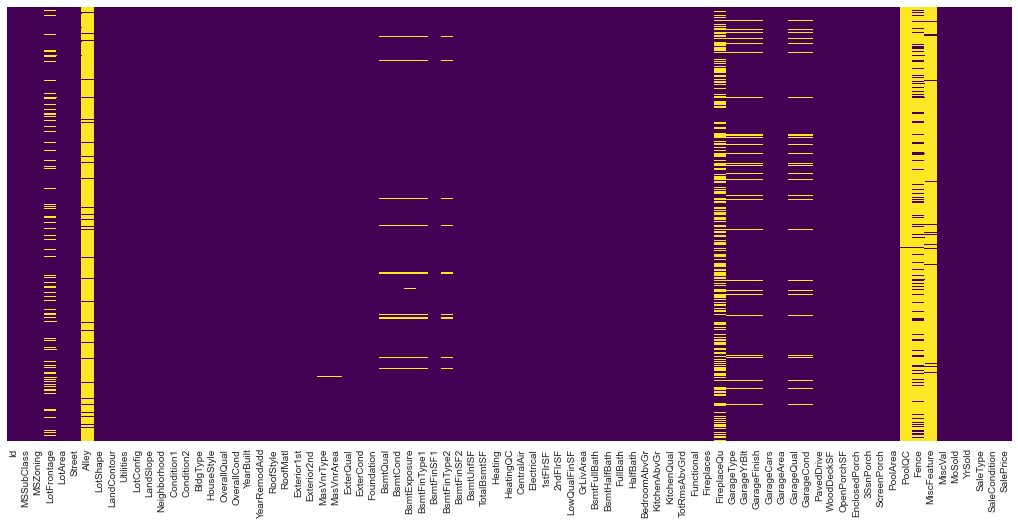

In [35]:
plt.figure(figsize=(18,8))
sns.heatmap(df.isnull(),cmap="viridis",cbar=False,yticklabels=False)

PERCENT OF MISSING VALUES

In [126]:
features_with_nan = [features for features in df.columns if df[features].isnull().sum()>=1]

for features in features_with_nan:
    print(features,np.round(df[features].isnull().mean(),4),'% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
Electrical 0.0007 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


FINDING RELATIONSHIP BETWEEN MISSING VALUES AND SALES PRICE

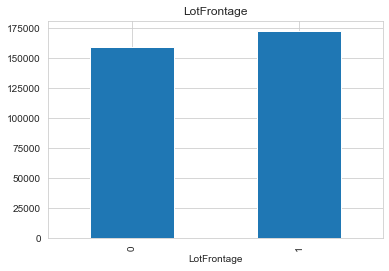

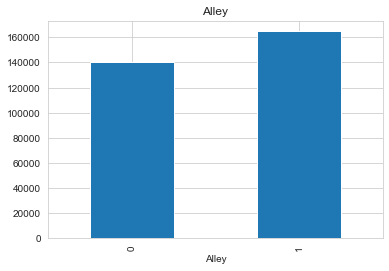

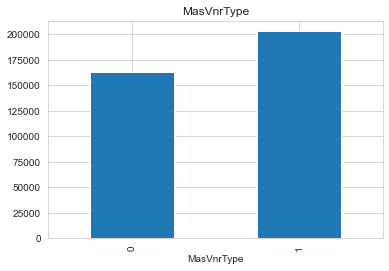

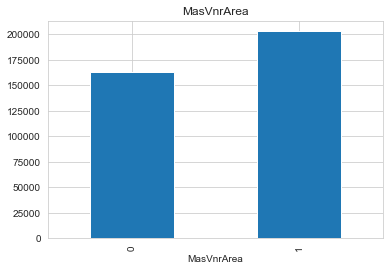

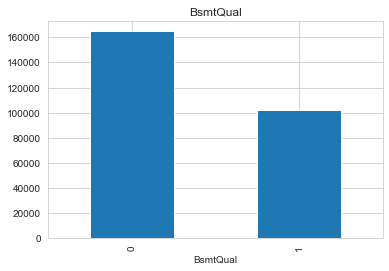

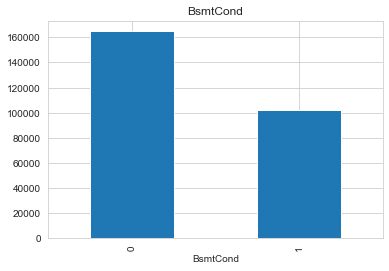

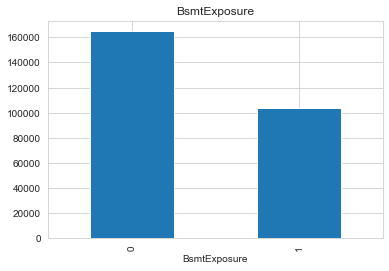

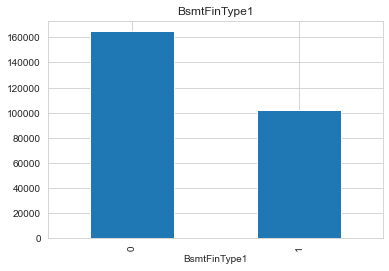

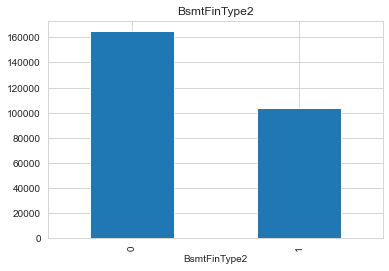

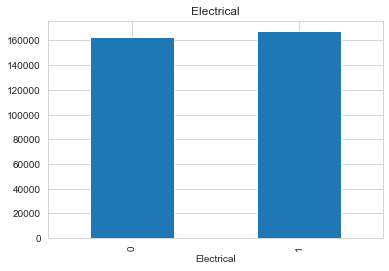

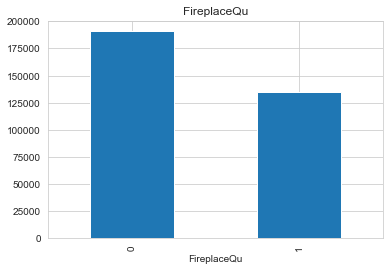

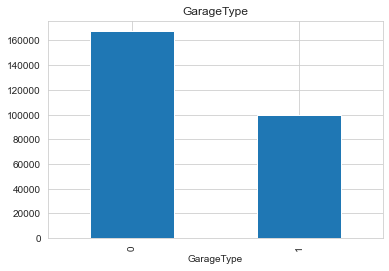

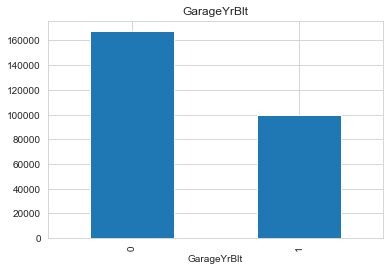

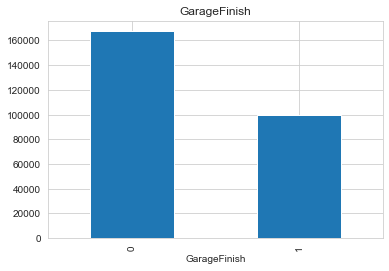

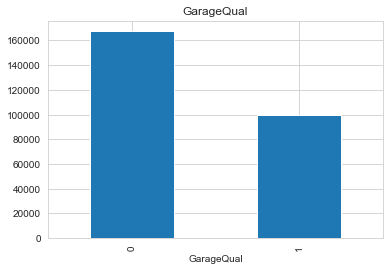

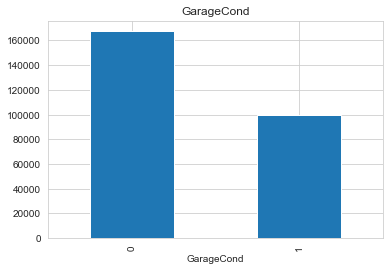

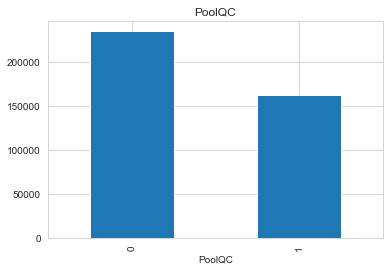

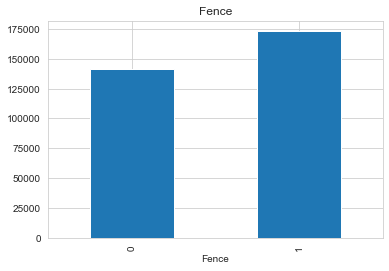

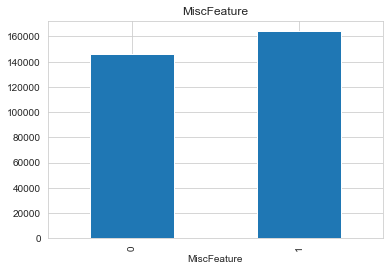

In [127]:
for features in features_with_nan:
    dataset = df.copy()
    
    dataset[features] = np.where(dataset[features].isnull(),1,0) # Making a variable that indicate 1 
                                                          # for observation == missing and 0 for 
                                                          #  for observation == non missing
    dataset.groupby(features)["SalePrice"].median().plot(kind="bar")
    plt.title(features)
    plt.show()

Here we observe that the missing value has some relation with the price, hence we have to somethig meaningful with the missing value in the Feature Engineerig part.

#### Numerical Values

In [128]:
# Here we'll check if the the feature data_type is not Object


numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print("number of numerical feature",len(numerical_feature))
df[numerical_feature].head()




number of numerical feature 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Year Data

In [129]:
year_feature = [ feature for feature in numerical_feature if "Yr" in feature or 'Year' in feature]

In [130]:
for yr in year_feature: print(yr,df[yr].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs Year Sold')

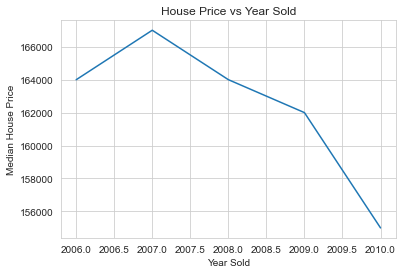

In [41]:
df.groupby("YrSold")["SalePrice"].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Median House Price")
plt.title("House Price vs Year Sold")

#### Below we'll analyse the relation between the price change with the the year_features at different segment of time

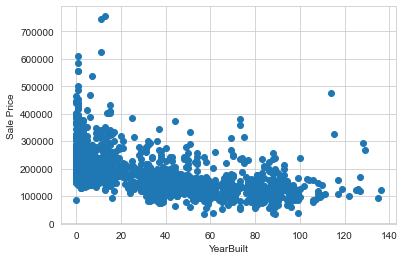

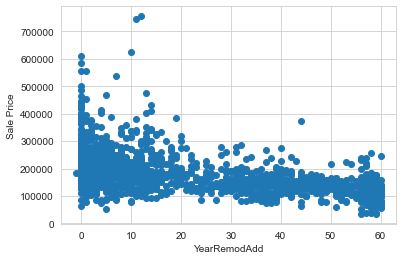

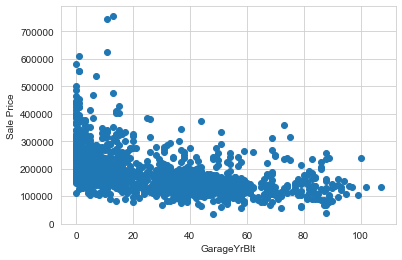

In [131]:
for feature in year_feature:
    if (feature != 'YrSold'):
        dataset = df.copy()
        
        dataset[feature] = dataset['YrSold']-dataset[feature]
        plt.scatter(dataset[feature],dataset["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("Sale Price")
        plt.show()

Numerical_features are of two types - Continuous variable and Discrete variable

Below we'll find discrete variable

Discrete variable

In [132]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique())<25 and feature not in year_feature+['Id']]

In [44]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

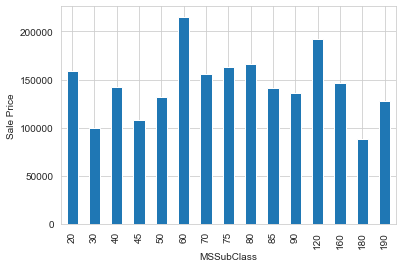

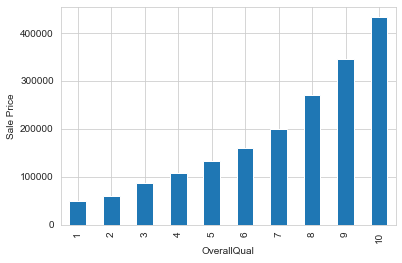

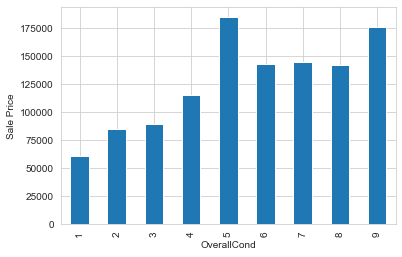

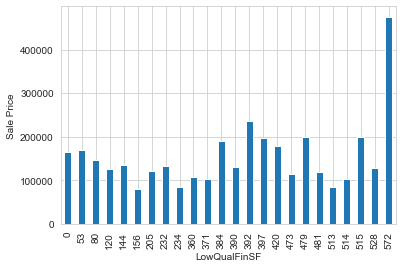

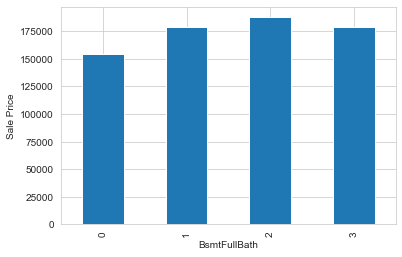

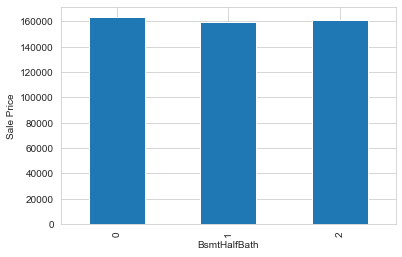

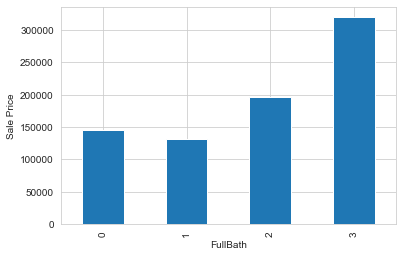

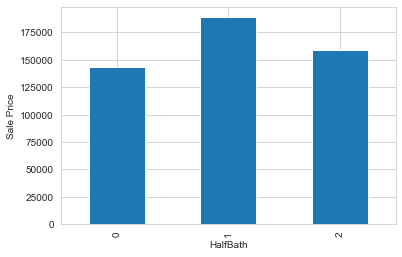

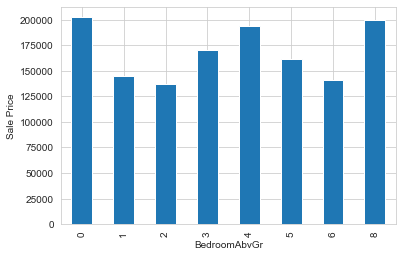

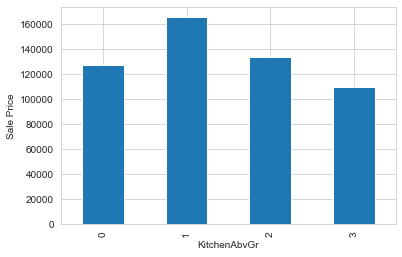

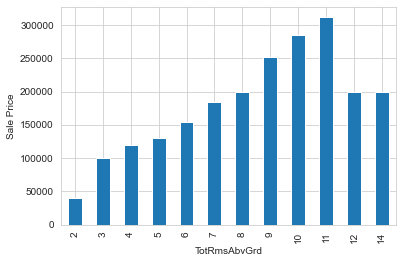

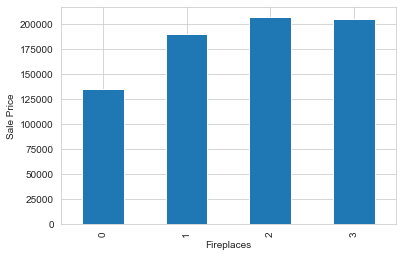

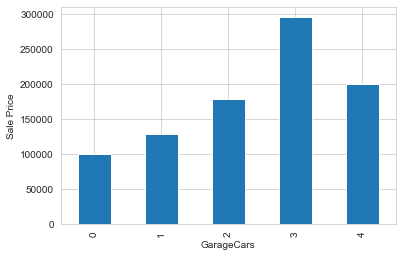

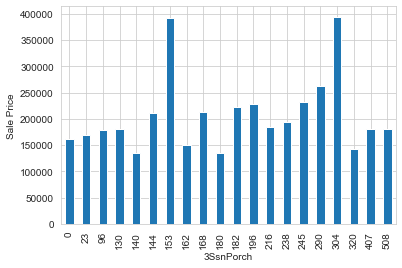

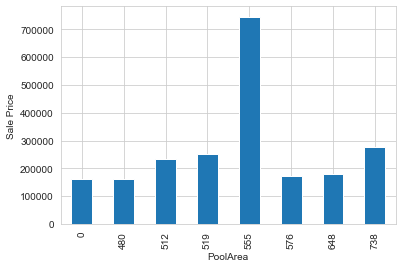

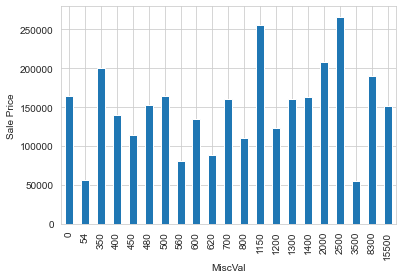

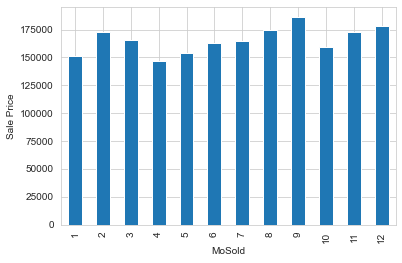

In [133]:
for feature in discrete_feature:
    dataset = df.copy()
    dataset.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.show()

Continuous variable

In [134]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature+['Id']+year_feature]
print("Continuous variable count: ",format(len(continuous_feature)))

Continuous variable count:  16


In [135]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

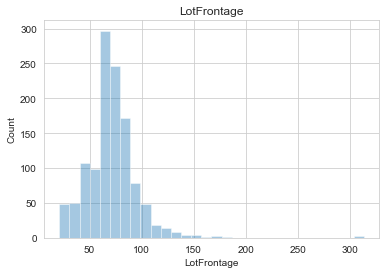

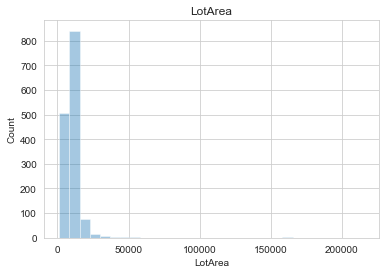

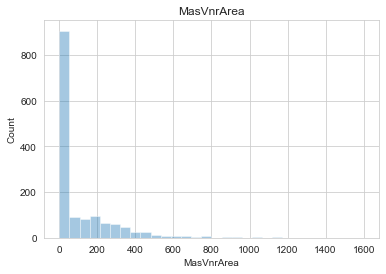

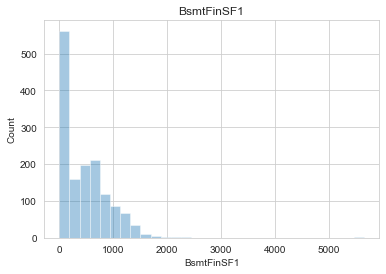

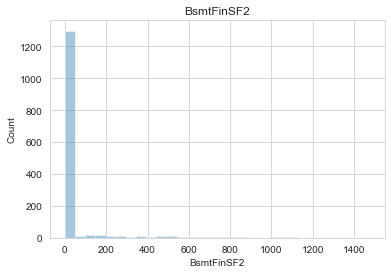

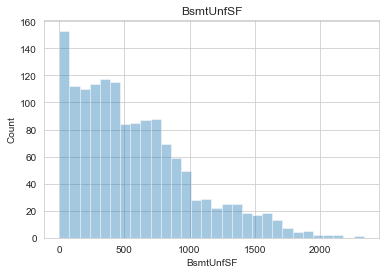

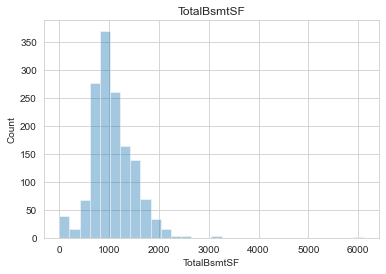

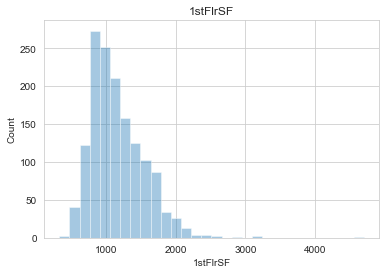

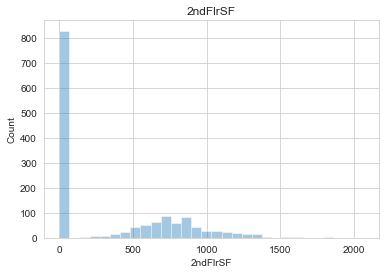

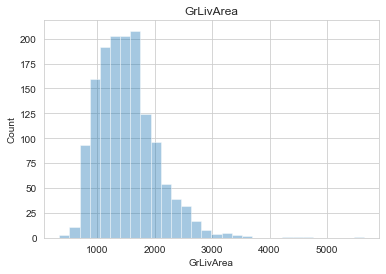

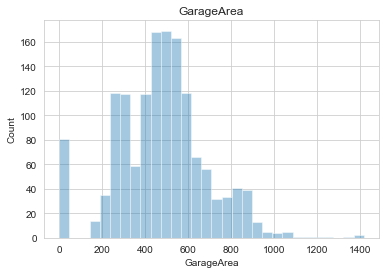

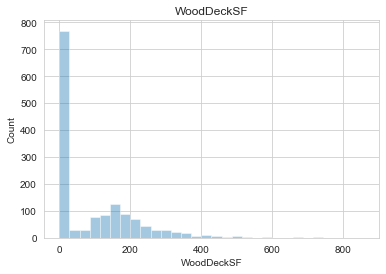

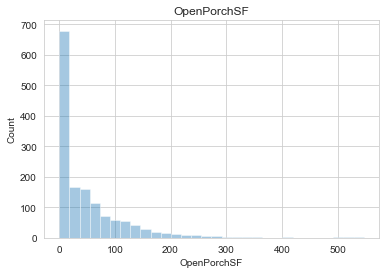

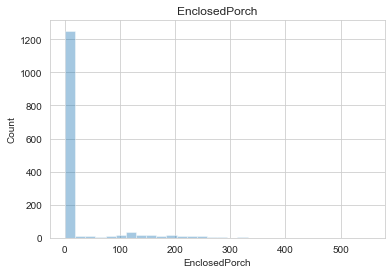

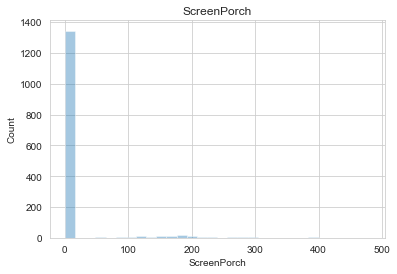

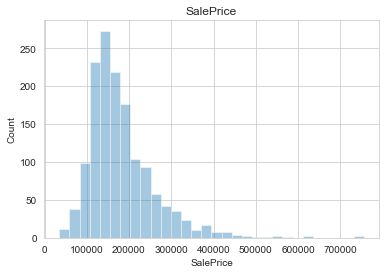

In [136]:
for feature in continuous_feature:
    dataset = df.copy()
    sns.set_style("whitegrid")
    sns.distplot(dataset[feature],bins=30,kde=False)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Outliers

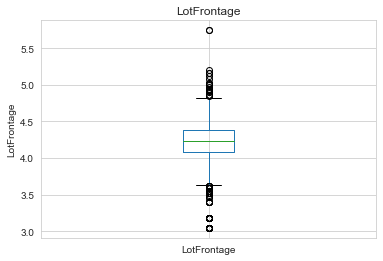

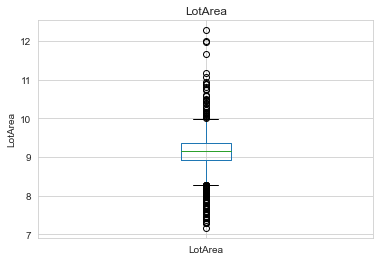

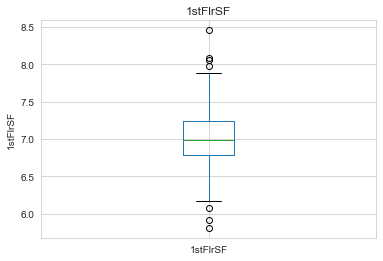

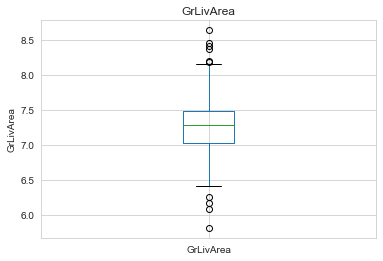

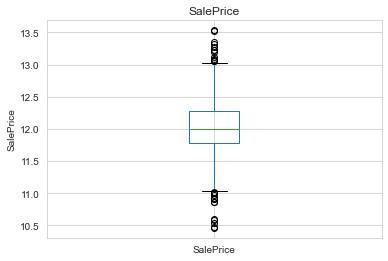

In [52]:
for feature in continuous_feature:
    dataset = df.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorial variable

In [137]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [138]:
for feature in categorical_feature:
    print("The feature is {} and number of categories are {}".format(feature,len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

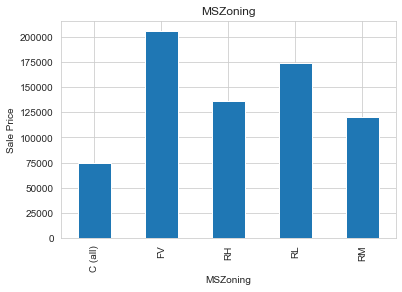

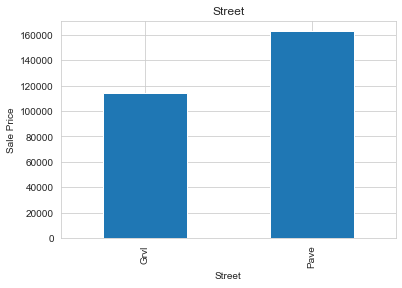

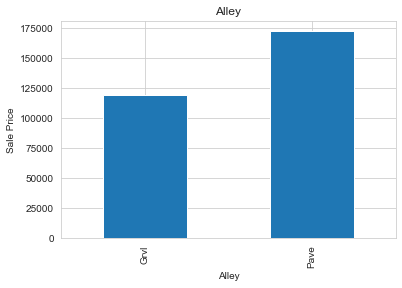

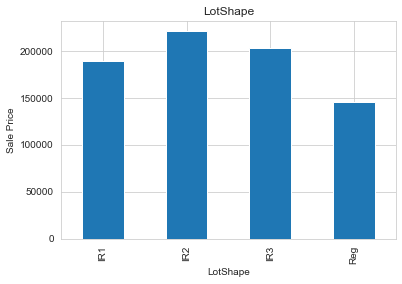

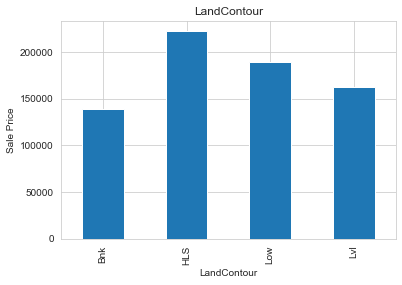

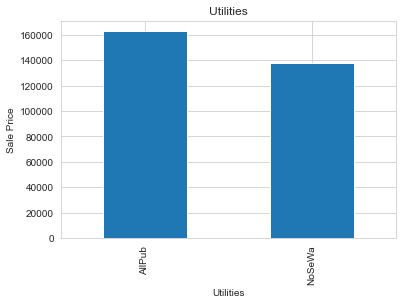

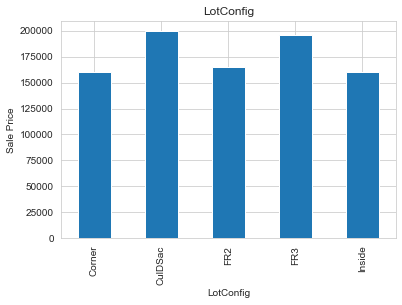

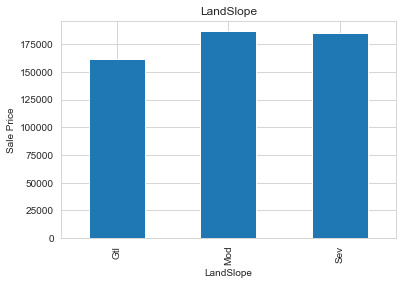

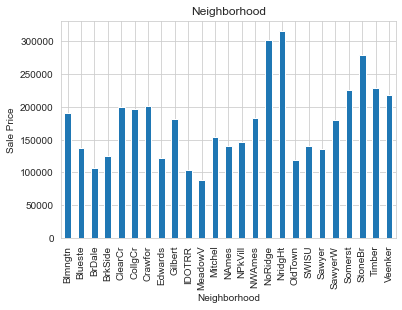

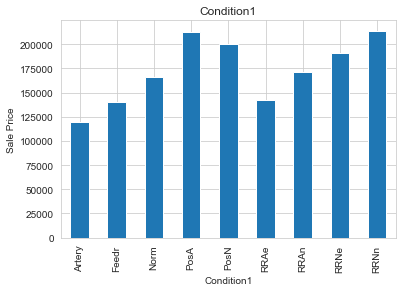

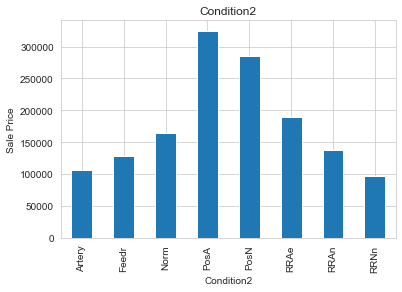

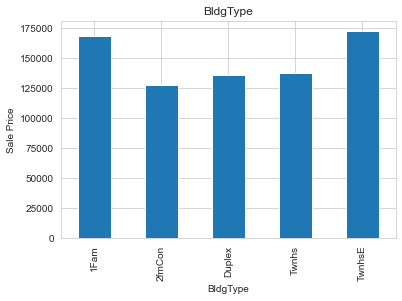

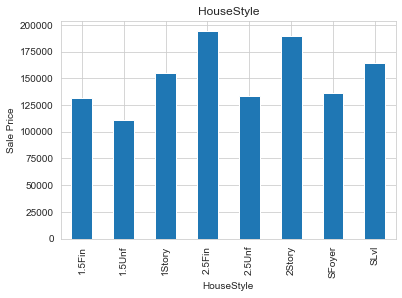

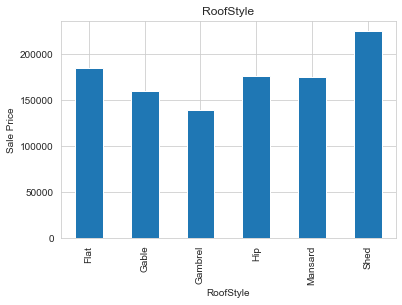

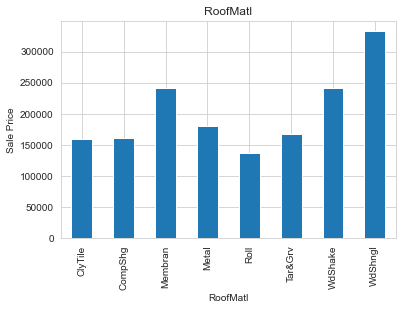

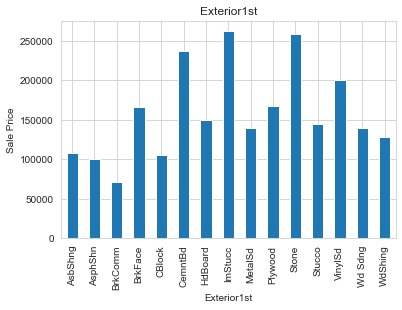

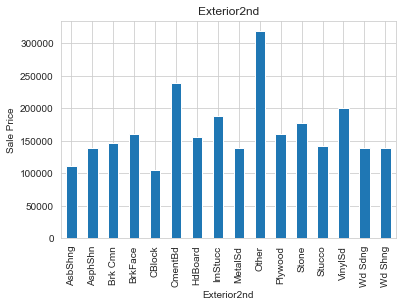

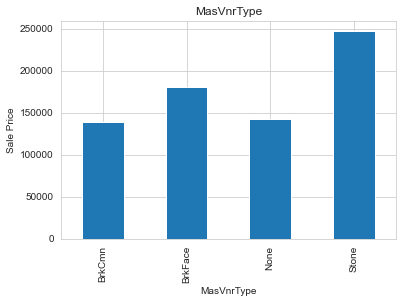

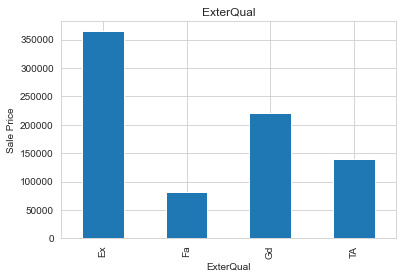

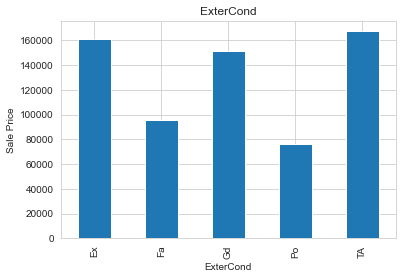

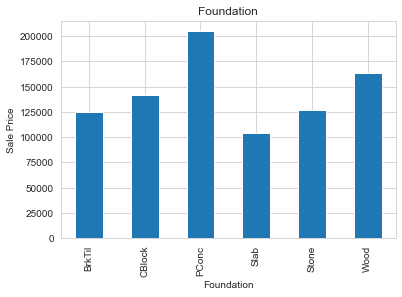

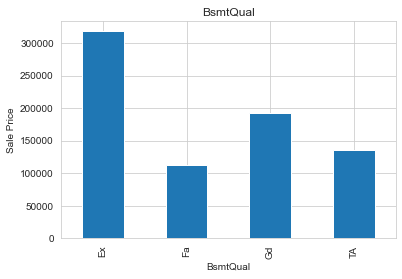

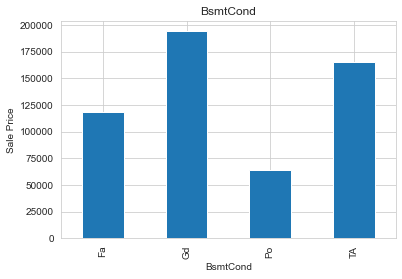

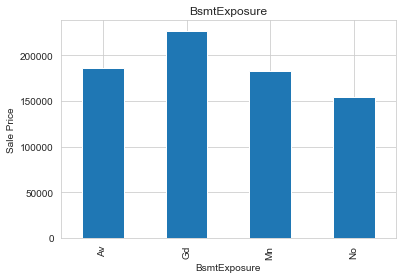

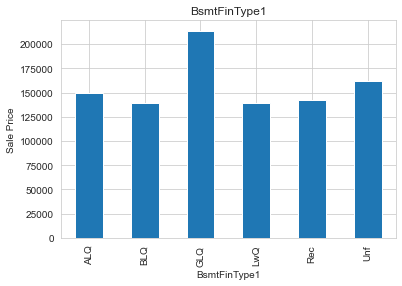

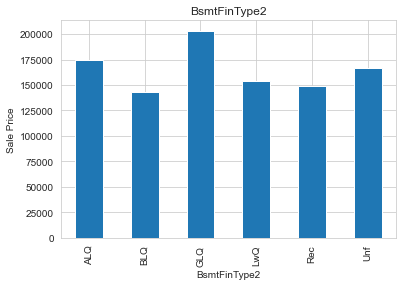

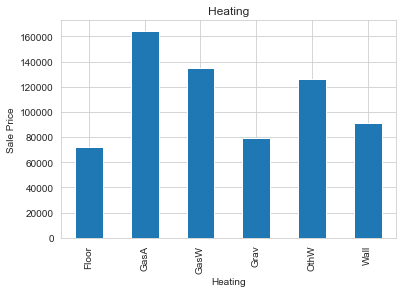

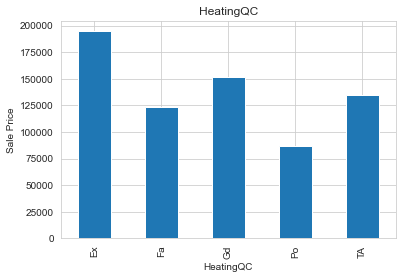

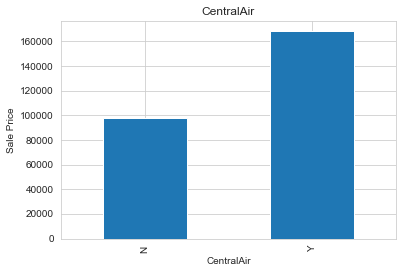

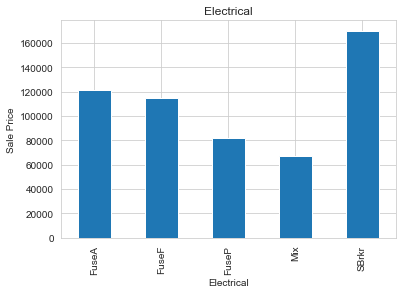

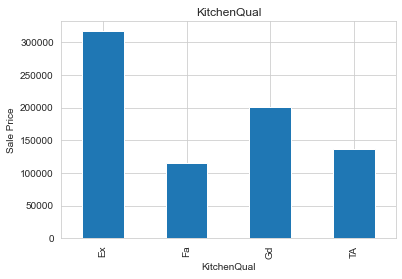

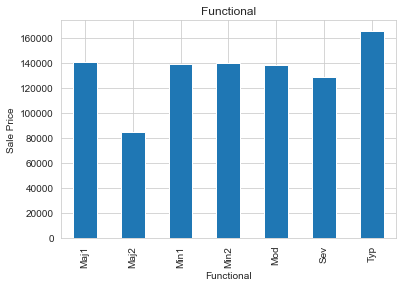

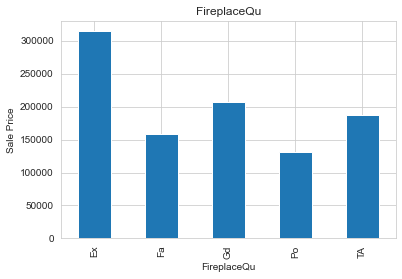

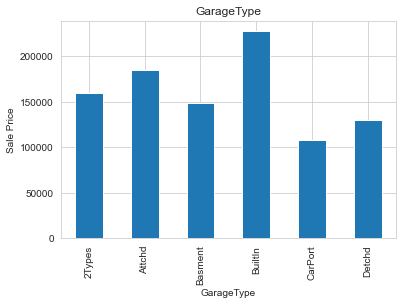

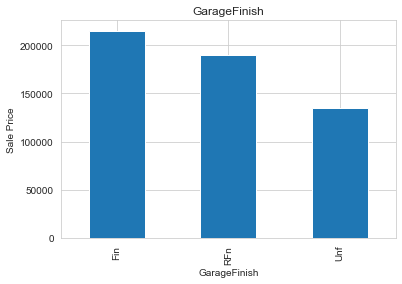

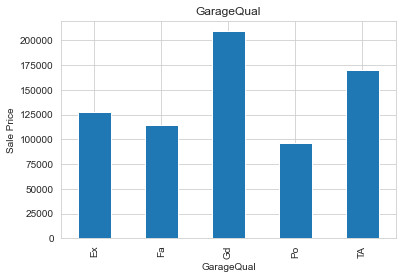

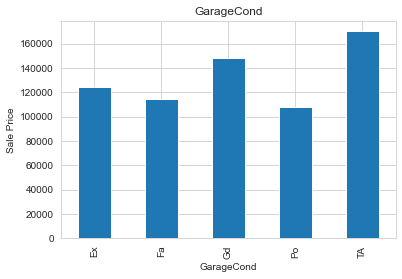

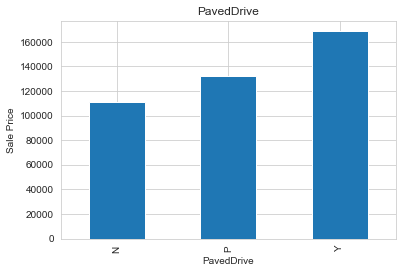

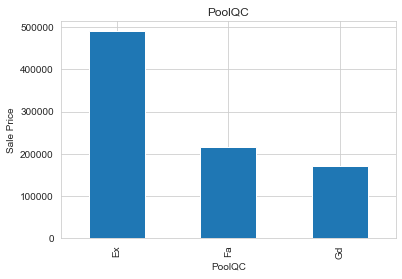

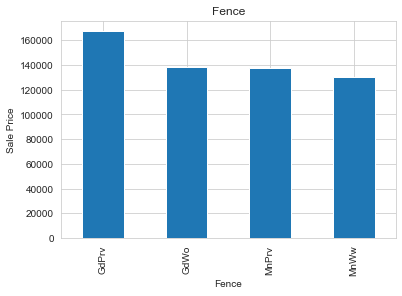

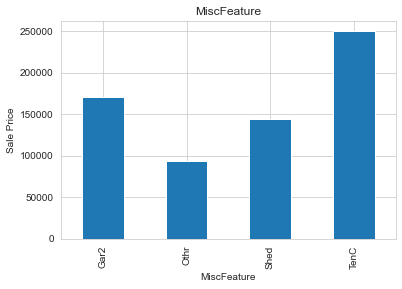

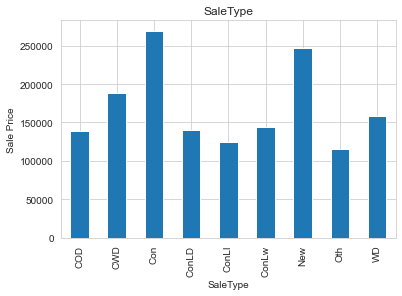

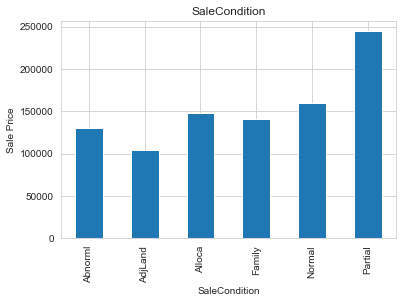

In [55]:
for feature in categorical_feature:
    dataset = df.copy()
    dataset.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.title(feature)
    plt.show()

## Feature Engineering

###  Handling Missing Values 

* Handling Categorical features with missing values

In [139]:
features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>=1 and df[feature].dtypes=='O']

for feature in features_nan:
    print(feature,':',np.round(df[feature].isnull().mean()*100,4)," % missing values")

Alley : 93.7671  % missing values
MasVnrType : 0.5479  % missing values
BsmtQual : 2.5342  % missing values
BsmtCond : 2.5342  % missing values
BsmtExposure : 2.6027  % missing values
BsmtFinType1 : 2.5342  % missing values
BsmtFinType2 : 2.6027  % missing values
Electrical : 0.0685  % missing values
FireplaceQu : 47.2603  % missing values
GarageType : 5.5479  % missing values
GarageFinish : 5.5479  % missing values
GarageQual : 5.5479  % missing values
GarageCond : 5.5479  % missing values
PoolQC : 99.5205  % missing values
Fence : 80.7534  % missing values
MiscFeature : 96.3014  % missing values


In [57]:
## Using the idea of Frequent Category Imputation
## But here we just replace the missing values with new label


def cat_feature_replace(df,features_nan):
    dataset = df.copy()
    dataset[features_nan]=dataset[features_nan].fillna("Missing")
    return dataset
df = cat_feature_replace(df,features_nan)
df[features_nan].isnull().sum()
    

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [140]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* Handling Numerical features with missing values 

In [141]:
numerical_feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>=1 and df[feature].dtypes !='O']

for feature in numerical_feature_nan:
    print(feature,' : ',np.round(df[feature].isnull().mean()*100,2),"% missing values")

LotFrontage  :  17.74 % missing values
MasVnrArea  :  0.55 % missing values
GarageYrBlt  :  5.55 % missing values


In [60]:
## Replacing the missing values of the numerical features

for feature in numerical_feature_nan:
    
    # capturing NAN value with new feature
    df[feature+'nan'] = np.where(df[feature].isnull(),1,0)
    df[feature].fillna(df[feature].median(),inplace = True)
    
df[numerical_feature_nan].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

In [61]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


* Handling Temporal variables

In [142]:
for feature in ['YearBuilt','YearRemodAdd',"GarageYrBlt"]:
    df[feature] = df['YrSold']-df[feature]

In [63]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


* Application of lognormal distribution on the skewed data

In [143]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature+['Id']+year_feature]

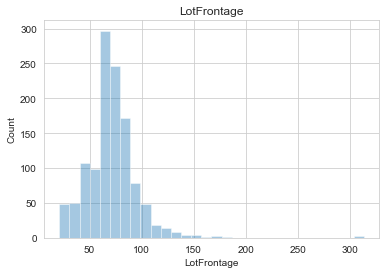

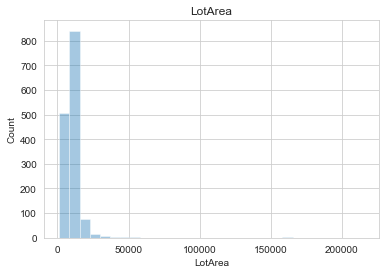

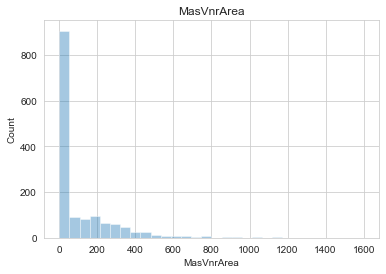

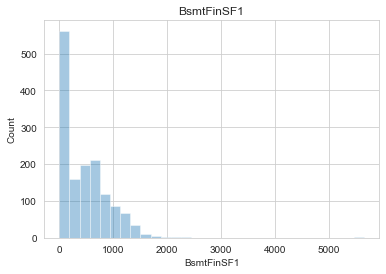

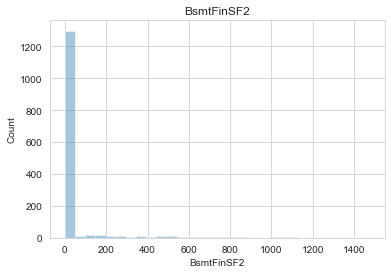

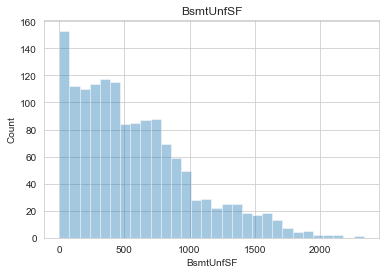

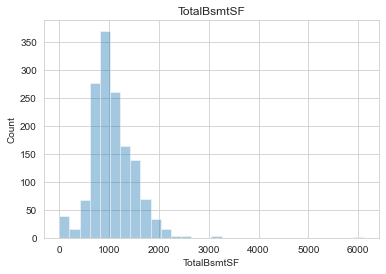

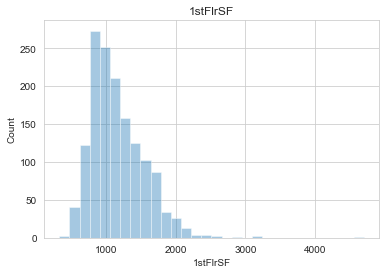

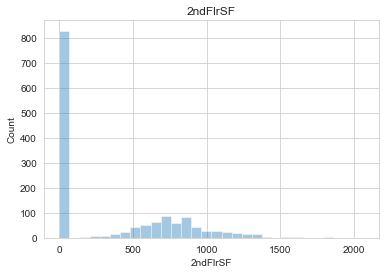

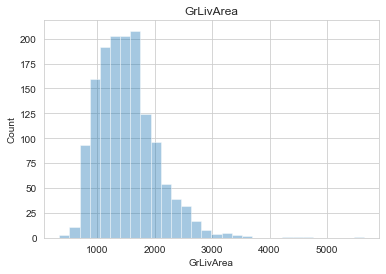

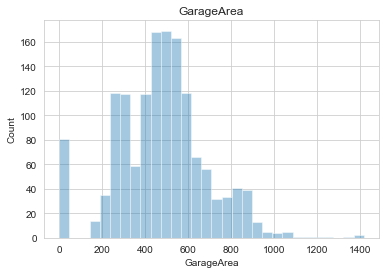

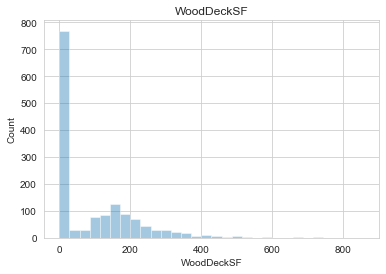

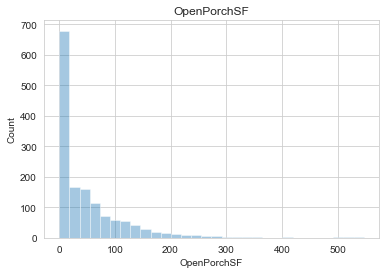

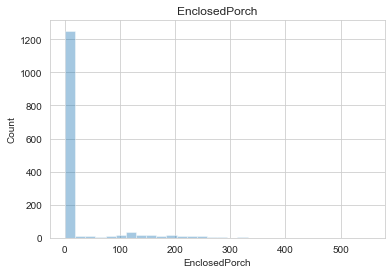

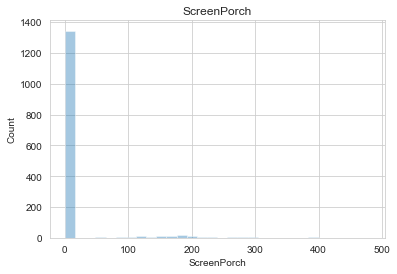

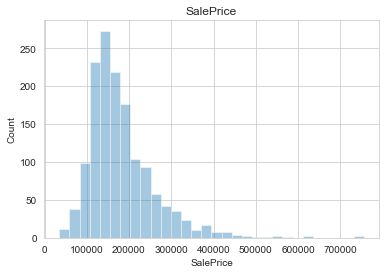

In [144]:
for feature in continuous_feature:
    dataset = df.copy()
    sns.set_style("whitegrid")
    sns.distplot(dataset[feature],bins=30,kde=False)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

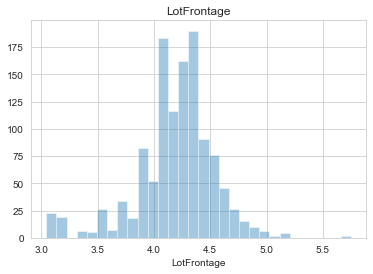

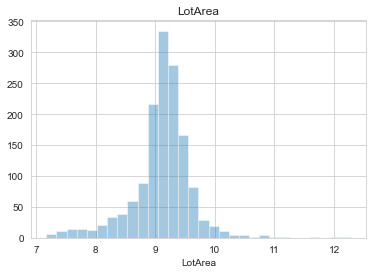

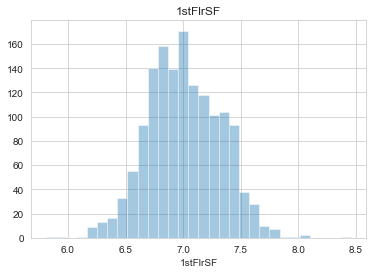

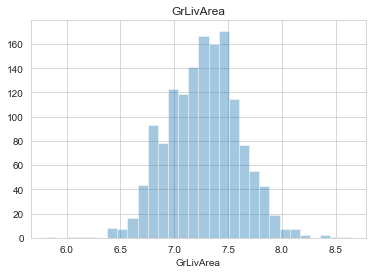

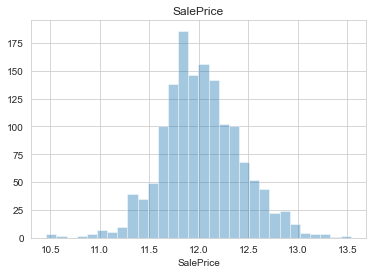

In [145]:
## Taking insights from above graphs
numerical_valued_feature = ["LotFrontage","LotArea","1stFlrSF","GrLivArea",'SalePrice']

for feature in numerical_valued_feature:
    df[feature] = np.log(df[feature])
    sns.distplot(df[feature],bins=30,kde=False)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

* We'll removing categorical variable that are present less than 1 % of the observation

In [146]:
categorical_valued_feature = [feature for feature in df.columns if df[feature].dtype=='O']

In [147]:
categorical_valued_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [149]:
for feature in categorical_valued_feature:
    temp = df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df = temp[temp>0.01].index
    df[feature] = np.where(dataset[feature].isin(temp_df),df[feature],"Rare_var")

In [69]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


## Feature Scaling

In [150]:
for feature in categorical_valued_feature:
    labels_ordered = df.groupby(feature)["Id"].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    df[feature] = df[feature].map(labels_ordered)
df.tail(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1410,1411,60,3,4.369448,9.427063,1,1,2,1,0,2,1,9,2,1,2,1,7,5,8,8,1,1,4,3,2,0.0,3,2,0,3,3,0,3,666,3,0,278,944,1,2,1,3,6.850126,896,0,7.517521,1,0,2,1,3,1,3,6,3,0,4,2,8.0,3,2,622,1,1,1,0,45,0,0,0,0,0,1,1,0,6,2009,3,2,12.345835
1411,1412,50,3,4.382027,9.169518,1,1,2,1,0,2,1,12,2,1,2,3,6,8,59,4,1,1,4,3,2,0.0,2,3,1,4,3,0,6,120,3,0,736,856,1,2,1,3,7.013915,556,0,7.419381,0,0,1,1,3,1,2,6,4,0,4,2,59.0,1,1,271,1,1,1,0,0,0,0,0,0,0,0,1,0,9,2009,3,2,11.849398
1412,1413,90,3,4.094345,8.881836,1,1,2,1,0,2,1,12,2,1,4,2,4,5,60,59,1,1,7,9,2,0.0,2,2,3,2,0,2,2,0,2,0,0,0,2,4,0,1,6.946976,0,0,6.946976,0,0,2,0,2,2,2,6,3,0,4,3,53.0,1,2,420,1,1,1,0,0,0,0,0,0,0,1,1,0,6,2009,3,2,11.407565
1413,1414,20,3,4.477337,9.305105,1,1,1,1,0,0,1,3,2,1,2,2,8,5,4,3,1,1,4,3,3,366.0,3,2,0,3,2,0,3,976,3,0,868,1844,1,2,1,3,7.519692,0,0,7.519692,1,0,2,0,2,1,3,7,3,1,5,2,4.0,2,2,620,1,1,1,165,44,0,0,0,0,0,1,1,0,9,2009,2,3,12.456831
1414,1415,50,3,4.158883,9.476773,1,0,2,2,0,2,1,11,2,1,2,3,6,7,85,8,0,1,2,1,2,0.0,2,2,2,4,3,0,5,0,3,0,833,833,1,1,1,3,6.959399,795,0,7.521859,0,0,1,1,4,1,3,8,3,1,5,3,86.0,1,2,370,1,1,0,0,0,0,0,220,0,0,1,1,0,6,2008,3,2,12.240474
1415,1416,120,3,3.931826,8.198364,1,1,2,1,0,2,1,17,2,1,3,2,7,5,2,2,2,1,4,3,1,130.0,3,2,0,3,3,0,1,988,3,0,398,1386,1,2,1,3,7.358194,0,0,7.358194,0,1,2,0,1,1,3,7,3,1,3,2,2.0,3,3,660,1,1,1,143,20,0,0,0,0,0,1,1,0,5,2009,3,2,12.077671
1416,1417,190,1,4.094345,9.336092,1,1,2,1,0,2,1,5,2,1,0,1,4,6,125,60,1,1,4,10,2,0.0,2,2,0,4,3,0,5,0,3,0,777,777,1,1,1,3,7.127694,1044,0,7.736307,0,0,2,0,4,2,2,11,3,0,4,3,39.0,1,2,560,1,1,0,0,0,114,0,0,0,0,1,1,0,4,2010,3,2,11.715866
1417,1418,60,3,NaN,9.713839,1,1,1,1,0,2,1,20,2,1,2,1,8,5,11,11,1,1,4,3,1,731.0,3,2,0,3,3,4,3,781,3,0,503,1284,1,2,1,3,7.177782,1140,0,7.803843,1,0,2,1,3,1,3,7,3,1,3,2,11.0,2,3,1069,1,1,1,0,126,0,0,0,0,0,1,1,0,5,2009,3,2,12.736701
1418,1419,20,3,4.262680,9.127393,1,1,2,1,0,2,1,12,2,1,2,2,5,5,45,45,1,1,5,7,2,0.0,2,2,1,4,3,0,6,25,5,872,247,1144,1,3,1,3,7.042286,0,0,7.042286,1,0,1,1,3,1,2,6,3,0,4,3,46.0,1,1,336,1,1,1,0,88,0,0,0,0,0,1,1,0,8,2008,2,2,11.728037
1419,1420,20,3,NaN,9.703877,1,1,1,1,0,2,1,19,2,1,2,2,6,5,37,37,1,1,1,0,1,312.0,3,3,1,4,3,3,4,1110,3,0,734,1844,1,1,1,3,7.519692,0,0,7.519692,1,0,2,0,3,1,3,7,3,1,3,2,37.0,3,2,540,1,1,1,0,73,216,0,0,0,0,1,1,0,12,2006,3,2,12.314927


In [151]:
feature_scaling=[feature for feature in df.columns if feature not in ["Id","SalePrice"]]

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[feature_scaling])

MinMaxScaler()

In [153]:
scaler.transform(df[feature_scaling])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.5       , 1.        ,
        0.5       ],
       [0.        , 0.75      , 0.49506375, ..., 0.25      , 1.        ,
        0.5       ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.5       , 1.        ,
        0.5       ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 1.        , 1.        ,
        0.5       ],
       [0.        , 0.75      , 0.434909  , ..., 1.        , 1.        ,
        0.5       ],
       [0.        , 0.75      , 0.47117546, ..., 0.5       , 1.        ,
        0.5       ]])

In [154]:
data = pd.concat([df[["Id","SalePrice"]].reset_index(drop = True),
                     pd.DataFrame(scaler.transform(df[feature_scaling]),columns = feature_scaling)],
                   axis=1)

In [155]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,0.5,0.666667,0.333333,0.0,0.50,0.5,0.409091,0.4,1.0,0.5,0.2,0.666667,0.500,0.036765,0.098361,0.5,1.0,0.4,0.3,0.25,0.12250,1.000000,0.666667,0.00,0.75,1.000000,0.00,0.500000,0.125089,0.6,0.0,0.064212,0.140098,0.5,0.50,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,1.000000,0.500000,0.75,0.000000,0.8,0.50,0.046729,1.000000,0.50,0.386460,0.5,0.5,0.5,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.090909,0.50,1.0,0.50
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,0.5,0.666667,0.333333,0.0,0.75,0.5,0.272727,0.8,1.0,0.5,0.4,0.555556,0.875,0.227941,0.524590,0.5,1.0,0.8,0.5,0.50,0.00000,0.666667,0.666667,0.25,0.75,1.000000,0.25,0.166667,0.173281,0.6,0.0,0.121575,0.206547,0.5,0.50,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.666667,0.333333,0.75,0.333333,0.6,0.50,0.289720,1.000000,0.50,0.324401,0.5,0.5,0.5,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.363636,0.25,1.0,0.50
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,0.5,0.333333,0.333333,0.0,0.50,0.5,0.409091,0.4,1.0,0.5,0.2,0.666667,0.500,0.051471,0.114754,0.5,1.0,0.4,0.3,0.25,0.10125,1.000000,0.666667,0.00,0.75,1.000000,1.00,0.500000,0.086109,0.6,0.0,0.185788,0.150573,0.5,0.50,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,1.000000,0.333333,0.75,0.333333,0.6,0.50,0.065421,1.000000,0.50,0.428773,0.5,0.5,0.5,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.727273,0.50,1.0,0.50
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,0.5,0.333333,0.333333,0.0,0.00,0.5,0.863636,0.4,1.0,0.5,0.2,0.666667,0.500,0.669118,0.606557,0.5,1.0,0.2,0.4,0.50,0.00000,0.666667,0.666667,0.50,1.00,0.666667,0.00,0.166667,0.038271,0.6,0.0,0.231164,0.123732,0.5,0.25,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,1.000000,0.416667,0.75,0.333333,1.0,0.75,0.074766,0.333333,0.75,0.452750,0.5,0.5,0.5,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.090909,0.00,1.0,0.75
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,0.5,0.333333,0.333333,0.0,0.75,0.5,0.909091,0.4,1.0,0.5,0.2,0.777778,0.500,0.058824,0.147541,0.5,1.0,0.4,0.3,0.25,0.21875,1.000000,0.666667,0.00,0.75,1.000000,0.75,0.500000,0.116052,0.6,0.0,0.209760,0.187398,0.5,0.50,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,1.000000,0.583333,0.75,0.333333,0.6,0.50,0.074766,1.000000,0.75,0.589563,0.5,0.5,0.5,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,1.000000,0.50,1.0,0.50


In [74]:
data.to_csv("cleaned_train.csv",index = False)

## Feature Selection

In [156]:
data.corr()["SalePrice"].nlargest(35).sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.817184
GrLivArea       0.730255
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.608947
FullBath        0.594771
TotRmsAbvGrd    0.534422
GarageFinish    0.502183
Fireplaces      0.489449
MasVnrArea      0.430809
LotArea         0.399918
BsmtFinSF1      0.372023
LotFrontage     0.364108
CentralAir      0.351600
MSZoning        0.341015
WoodDeckSF      0.334135
OpenPorchSF     0.321053
2ndFlrSF        0.319300
HalfBath        0.313982
Electrical      0.295790
BsmtFullBath    0.236224
KitchenQual     0.232606
BsmtCond        0.229125
BsmtUnfSF       0.221985
BedroomAbvGr    0.209044
PavedDrive      0.195079
ExterQual       0.193481
RoofStyle       0.182803
GarageCond      0.181201
BsmtExposure    0.159195
GarageQual      0.134029
ScreenPorch     0.121208
ExterCond       0.099677
Name: SalePrice, dtype: float64

In [157]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
pd.pandas.set_option("display.max_columns",None)

In [158]:
dataset = pd.read_csv("cleaned_train.csv")

In [189]:
y = dataset[("SalePrice")]

In [190]:
X =dataset.drop(["Id","SalePrice"],axis=1)

In [161]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [162]:
feature_sel_model.get_support()

array([ True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [163]:
selected_feat = X.columns[(feature_sel_model.get_support())]

print("total feature: {}".format((X.shape[1])))
print("selected feature:{}".format(len(selected_feat)))
print("feature with coefficient shrank to zero:{}".format(np.sum(feature_sel_model.estimator_.coef_==0)))

total feature: 82
selected feature:15
feature with coefficient shrank to zero:67


In [164]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotShape', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'Foundation', 'BsmtQual', 'CentralAir', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageFinish',
       'GarageCars'],
      dtype='object')

In [208]:
X = X[['MSSubClass', 'MSZoning', 'LotShape', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'Foundation', 'BsmtQual', 'CentralAir', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageFinish',
       'GarageCars']]

In [85]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [166]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [167]:
print(model.feature_importances_)

[0.01617066 0.02626775 0.01057927 0.31440596 0.06535467 0.04344725
 0.02288799 0.03757437 0.03548881 0.05099186 0.13391234 0.01586469
 0.03536387 0.08663291 0.1050576 ]


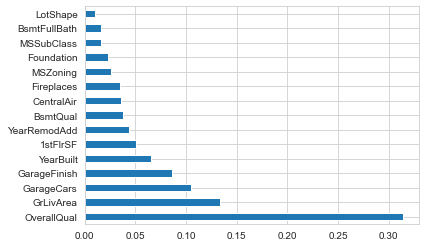

In [168]:
## Plot graph of features imoprtance for better visualization
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(15).plot(kind='barh')
plt.show()

In [220]:
feat_importance.index

Index(['MSSubClass', 'MSZoning', 'LotShape', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'Foundation', 'BsmtQual', 'CentralAir', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageFinish',
       'GarageCars'],
      dtype='object')

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Models

#### RandomForestRegressor

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
### Hyperparamater Tuning 
import numpy as np
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [92]:
# Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
# Number of features to consider at every split 
max_features = ["auto",'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=60)]
# max_depth.append(None)
# Minimum number of sample required to split a node
min_sample_split=[2,5,10,15,100]
# Minimum number of sample required at each leaf node
min_sample_leaf = [1,2,5,10]

In [93]:
from sklearn.model_selection import RandomizedSearchCV 

In [94]:
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'min_samples_split': min_sample_split,
              'min_samples_leaf': min_sample_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [95]:
rf = RandomForestRegressor()

In [96]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter = 10,cv = 5,verbose = 2,random_state = 42,n_jobs=1)

In [97]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, total=   1.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, total=   1.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, total=   1.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, total=   0.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, total=   0.9s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=sqrt 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, total=   1.4s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=sqrt 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, tot

[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, total=   2.4s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, total=   2.2s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, total=   2.4s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, total=   2.1s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [98]:
prediction =  rf_random.predict(X_test)

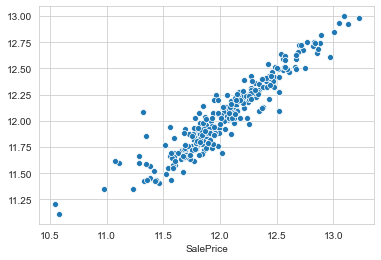

In [99]:
sns.scatterplot(y_test,prediction)

In [101]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 0.09503948478452809
MSE: 0.020515139995313732
RMSE: 0.1432310720315733


#### RidgeRegressor

In [102]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [103]:
ridge = Ridge()
parameter={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [104]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-0.022668833986819365


In [105]:
prediction = ridge_regressor.predict(X_test)

In [107]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 0.10287114205375042
MSE: 0.019958968731969912
RMSE: 0.14127621431780338


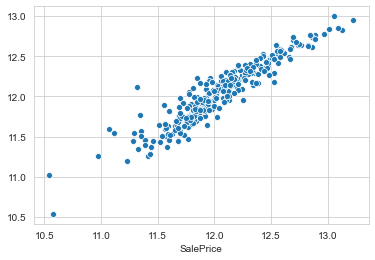

In [108]:
sns.scatterplot(y_test,prediction)

#### LassoRegressor

In [109]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [110]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-0.02266909047408757


In [111]:
prediction = lasso_regressor.predict(X_test)

In [113]:
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 0.1028664107569211
MSE: 0.019956831867392322
RMSE: 0.14126865139652295


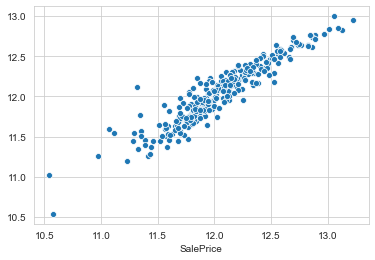

In [114]:
sns.scatterplot(y_test,prediction)

#### GradientBoostingRegressor

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

regressorGB = GradientBoostingRegressor(
    max_depth=5,
    n_estimators=10000,
    learning_rate=0.25
)
regressorGB.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.25, max_depth=5, n_estimators=10000)

In [129]:
prediction = regressorGB.predict(X_test)

In [130]:
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 0.09899712740753243
MSE: 0.02016534375864845
RMSE: 0.14200473146571013


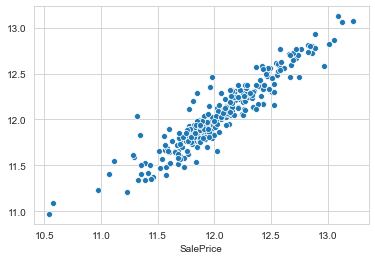

In [131]:
sns.scatterplot(y_test,prediction)

#### XGBRegressor

In [132]:
import xgboost
model = xgboost.XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [134]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [135]:
# Set up the random search with 4-fold cross validation

random_cv = RandomizedSearchCV(estimator=model,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [136]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   20.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   51.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_par...
                                          validate_parameters=1,
                                          verbosity=None),
                   n_it

In [137]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [138]:
model=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [139]:
model = model.fit(X_train,y_train)

[02:59:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:59:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [169]:
prediction = model.predict(X_test)


In [141]:
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 0.09469829132566975
MSE: 0.021315527852462077
RMSE: 0.14599838304742307


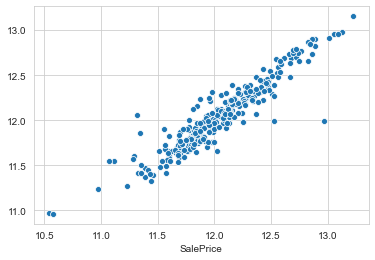

In [142]:
sns.scatterplot(y_test,prediction)

#### We see that all the Models more or less performed same but LassoRegressor did better than others. Hence we proceed with LassoRegression 

In [209]:
test = pd.read_csv('cleaned_test.csv',usecols=['MSSubClass', 'MSZoning', 'LotShape', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'Foundation', 'BsmtQual', 'CentralAir', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageFinish',
       'GarageCars'])

In [200]:
test1 = pd.read_csv("cleaned_test.csv",usecols=['Id'])

In [192]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [210]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-10}
-0.02196026326412686


In [211]:
X.shape

(1460, 15)

In [212]:
test.shape

(1459, 15)

In [213]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'Foundation', 'BsmtQual', 'CentralAir', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageFinish',
       'GarageCars'],
      dtype='object')

In [196]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,0.000000,0.25,0.593445,0.566360,1.0,0.5,0.666667,0.000000,1.0,0.50,0.5,0.45,0.666667,0.0,0.75,0.0,0.444444,0.625,0.384615,0.822581,0.5,0.0,0.0,0.181818,0.50,0.000000,1.000000,0.333333,0.25,0.75,0.25,0.0,0.333333,0.116708,0.000000,0.094364,0.126168,0.173111,1.0,0.25,0.0,0.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,0.75,0.166667,0.0,0.00,0.6,0.333333,0.792994,0.666667,0.2,0.490591,0.333333,0.0,0.5,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,1.0,0.5,0.000000,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1462,0.000000,0.50,0.598957,0.622527,1.0,0.5,0.333333,0.000000,1.0,0.25,0.5,0.45,0.500000,0.0,0.75,0.0,0.555556,0.625,0.407692,0.870968,0.0,0.0,0.5,0.636364,0.25,0.083721,1.000000,0.333333,0.25,0.75,0.25,0.0,0.500000,0.230175,0.666667,0.000000,0.189720,0.260844,1.0,0.25,0.0,0.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.50,0.250000,0.0,0.00,0.6,0.333333,0.802548,0.666667,0.2,0.209677,0.333333,0.0,0.5,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,1.0,0.735294,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1463,0.235294,0.50,0.558854,0.614005,1.0,0.5,0.333333,0.000000,1.0,0.50,0.5,0.00,0.500000,0.0,0.75,0.2,0.444444,0.500,0.107692,0.225806,0.5,0.0,0.0,0.181818,0.50,0.000000,1.000000,0.333333,0.00,0.25,0.25,0.0,0.000000,0.197257,0.666667,0.000000,0.064019,0.182139,1.0,0.75,0.0,0.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,0.75,0.250000,0.0,0.25,0.2,0.333333,0.678344,0.000000,0.4,0.323925,0.333333,0.0,0.5,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,1.0,0.5,0.000000,0.181818,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1464,0.235294,0.50,0.582212,0.524583,1.0,0.5,0.333333,0.000000,1.0,0.50,0.5,0.00,0.500000,0.0,0.75,0.2,0.555556,0.625,0.100000,0.225806,0.5,0.0,0.0,0.181818,0.25,0.015504,1.000000,0.333333,0.00,0.75,0.25,0.0,0.000000,0.150125,0.666667,0.000000,0.151402,0.181747,1.0,0.00,0.0,0.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.50,0.333333,0.0,0.25,0.0,0.333333,0.675159,0.000000,0.4,0.315860,0.333333,0.0,0.5,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,0.5,0.000000,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1465,0.588235,0.50,0.317987,0.335596,1.0,0.5,0.333333,0.666667,1.0,0.50,0.5,0.55,0.500000,0.0,0.00,0.0,0.777778,0.500,0.146154,0.322581,0.5,0.0,0.3,0.272727,0.50,0.000000,0.666667,0.333333,0.00,0.25,0.25,0.0,0.500000,0.065586,0.666667,0.000000,0.475234,0.251227,1.0,0.00,0.0,0.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.50,0.166667,0.0,0.00,0.6,0.333333,0.694268,0.333333,0.4,0.340054,0.333333,0.0,0.5,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.5,0.5,0.000000,0.000000,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
prediction = lasso_regressor.predict(test)
prediction

array([11.33067131, 11.68551712, 11.84781177, ..., 11.77210738,
       11.4788558 , 12.13892631])

#### since the training was done with log values hence we have to convert the prediction values to exponential form

In [215]:
solution = pd.DataFrame( {"id":test1.Id,"SalePrice":prediction})


In [216]:
solution["SalePrice"] = np.exp(solution['SalePrice'])

In [217]:
solution

,id,SalePrice
0,1461,83338.950252
1,1462,118838.073188
2,1463,139778.146197
3,1464,147858.530086
4,1465,159700.053766
...,...,...
1454,2915,79463.603453
1455,2916,82982.028456
1456,2917,129586.952393
1457,2918,96650.417079


In [188]:
solution.to_csv("_Prediction.csv", index = False)